In [1]:
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

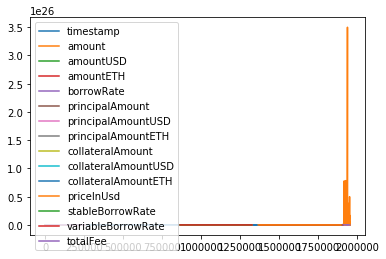

In [2]:
transaction_rds = pyreadr.read_r('/data/IDEA_DeFi_Research/Data/Lending_Protocols/Aave/V2/Mainnet/transactions.rds')
df = transaction_rds[None]
df.plot() # plot the data

In [3]:
df_pandas = pd.DataFrame(df) # set to pandas data frame
transaction_rds_data_label = df_pandas.columns.tolist()
# print(transaction_rds_data_label) # use to check the data label

In [4]:
df_pandas.head() # check the basic data, know the sample of data

,id,type,timestamp,user,userAlias,onBehalfOf,onBehalfOfAlias,pool,reserve,amount,...,liquidatorAlias,priceInUsd,borrowRateModeTo,borrowRateModeFrom,stableBorrowRate,variableBorrowRate,target,totalFee,version,deployment
0,0xc70f4c3f447f6a88e9fbb87ac1394b589e469ee57dda...,borrow,1.606841e+09,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,Rocky Kuebler,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,Rocky Kuebler,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,DAI,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet
1,0x1ee3db904548c16d2ed3572f3d9894652e031facc8fa...,borrow,1.606902e+09,0x21d05071ca08593e13cd3afd0b4869537e015c92,Odaly Chihuahua-Tovar,0x21d05071ca08593e13cd3afd0b4869537e015c92,Odaly Chihuahua-Tovar,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,DAI,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet
2,0x1e8f85330edc5005ead7a7ae8c418fbb64df726d4ffc...,borrow,1.606905e+09,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,LINK,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet
3,0x43136c7aba13c072bb19ed88f8eadf859f0bfb994b42...,borrow,1.606913e+09,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,AAVE,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet
4,0xd96af0cf05a1e99125fe51ee7e27a1c96cf40ea6e596...,borrow,1.606915e+09,0xdad4c11e8cc6a5c37808d3b31b3b284809f702d1,Jalen Mitchell,0xdad4c11e8cc6a5c37808d3b31b3b284809f702d1,Jalen Mitchell,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,DAI,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet


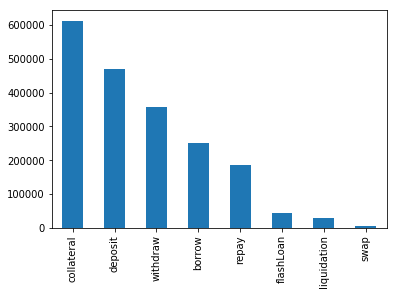

In [5]:
data_type = df_pandas["type"]
data_type.value_counts().plot(kind='bar')

In [6]:
# get all borrow type transactions
borrow_type = df_pandas[df_pandas["type"] == "borrow"]

# only keep id and timestamp
borrow_type = borrow_type[["id", "timestamp"]]
borrow_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251342 entries, 0 to 251341
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         251342 non-null  object 
 1   timestamp  251342 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.8+ MB


In [7]:
# convert timestamp to datetime, with unit days
borrow_type["timestamp"] = pd.to_datetime(borrow_type["timestamp"], unit='s')
borrow_type.head()

# convert datetime to date
borrow_type["date"] = borrow_type["timestamp"].dt.date
borrow_type.head()

# drop timestamp
borrow_type = borrow_type.drop(columns=["timestamp"])
borrow_type.head()

,id,date
0,0xc70f4c3f447f6a88e9fbb87ac1394b589e469ee57dda...,2020-12-01
1,0x1ee3db904548c16d2ed3572f3d9894652e031facc8fa...,2020-12-02
2,0x1e8f85330edc5005ead7a7ae8c418fbb64df726d4ffc...,2020-12-02
3,0x43136c7aba13c072bb19ed88f8eadf859f0bfb994b42...,2020-12-02
4,0xd96af0cf05a1e99125fe51ee7e27a1c96cf40ea6e596...,2020-12-02


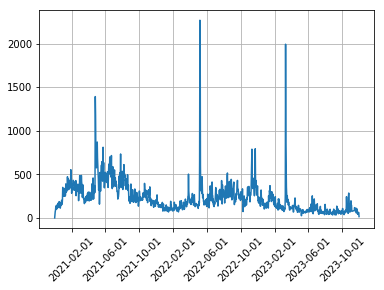

In [8]:
# Plot the number of borrow transactions through time
plt.plot(borrow_type["date"].value_counts().sort_index())
# Format x-axis to display dates in "YYYY-MM-DD" format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)  # rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [9]:
# create a 'DateTime' column from the 'timestamp' column 
df_pandas['DateTime'] = df_pandas['timestamp'].transform(lambda x: datetime.datetime.fromtimestamp(x))
df_pandas.head() # check the updated data

,id,type,timestamp,user,userAlias,onBehalfOf,onBehalfOfAlias,pool,reserve,amount,...,priceInUsd,borrowRateModeTo,borrowRateModeFrom,stableBorrowRate,variableBorrowRate,target,totalFee,version,deployment,DateTime
0,0xc70f4c3f447f6a88e9fbb87ac1394b589e469ee57dda...,borrow,1.606841e+09,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,Rocky Kuebler,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,Rocky Kuebler,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,DAI,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet,2020-12-01 11:46:58
1,0x1ee3db904548c16d2ed3572f3d9894652e031facc8fa...,borrow,1.606902e+09,0x21d05071ca08593e13cd3afd0b4869537e015c92,Odaly Chihuahua-Tovar,0x21d05071ca08593e13cd3afd0b4869537e015c92,Odaly Chihuahua-Tovar,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,DAI,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet,2020-12-02 04:34:18
2,0x1e8f85330edc5005ead7a7ae8c418fbb64df726d4ffc...,borrow,1.606905e+09,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,LINK,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet,2020-12-02 05:24:50
3,0x43136c7aba13c072bb19ed88f8eadf859f0bfb994b42...,borrow,1.606913e+09,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,AAVE,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet,2020-12-02 07:47:21
4,0xd96af0cf05a1e99125fe51ee7e27a1c96cf40ea6e596...,borrow,1.606915e+09,0xdad4c11e8cc6a5c37808d3b31b3b284809f702d1,Jalen Mitchell,0xdad4c11e8cc6a5c37808d3b31b3b284809f702d1,Jalen Mitchell,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,DAI,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet,2020-12-02 08:10:19


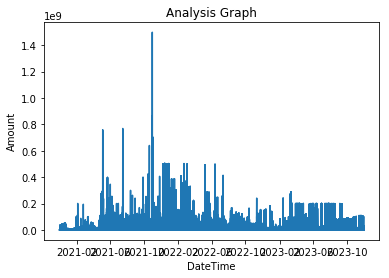

In [10]:
# start to draw the graph set x_axis is DateTime and y_axis is amount
df_pandas['DateTime'] = pd.to_datetime(df_pandas['DateTime'])

# convert DataFrame columns to numpy arrays
x = df_pandas["DateTime"].values
y = df_pandas["amountUSD"].values

# plot the graph
plt.plot(x, y)
plt.title("Analysis Graph")
plt.xlabel("DateTime")
plt.ylabel("Amount")
plt.show()

Combine DateTime in the same day together, and then i add their label(amount)together to draw a curve graph, Y_axis is amount, X_axis is Datetime.
FE: DateTime 2021-07-01 11:46:58, amount 1 and DateTime 2021-07-01 12:46:58, amount 2 All belong to 2021-07-01, so i will add 1 and 2 together to draw the curve graph.

In [11]:
# convert timestamp to datetime
df_pandas['DateTime'] = pd.to_datetime(df_pandas['timestamp'], unit='s')

# group by date and sum the amounts
# grouped_df = df_pandas.groupby(df_pandas['DateTime'].dt.date)['amount'].sum().reset_index()
grouped_df = df_pandas.groupby(df_pandas['DateTime'].dt.date)['amountUSD'].sum().reset_index()

df_pandas['DateTime'].dt.date: This part extracts the date component from the 'DateTime' column of the DataFrame df_pandas.
The .dt.date accessor is used to access the date component of each datetime value.

df_pandas.groupby(df_pandas['DateTime'].dt.date): This part groups the DataFrame df_pandas by the date extracted in the previous step.
It creates a GroupBy object where rows with the same date are grouped together.

['amount'].sum(): This part specifies that we want to sum the values in the 'amount' column for each group created in the previous step.
It calculates the total amount for each date.

.reset_index(): This part resets the index of the resulting DataFrame.
By default, when you perform operations like groupby and sum, the resulting DataFrame will have a hierarchical index.
The .reset_index() method is used to convert this hierarchical index into a simple DataFrame with a default integer index.

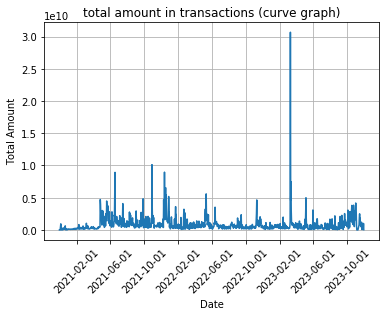

In [12]:
# plot the line graph
# plt.plot(grouped_df['DateTime'].values, grouped_df['amount'].values)
plt.plot(grouped_df['DateTime'].values, grouped_df['amountUSD'].values)
plt.title("total amount in transactions (curve graph)")
plt.xlabel("Date")
plt.ylabel("Total Amount")
# Format x-axis to display dates in "YYYY-MM-DD" format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)  # rotate x-axis labels for better readability
plt.grid(True)
plt.show()

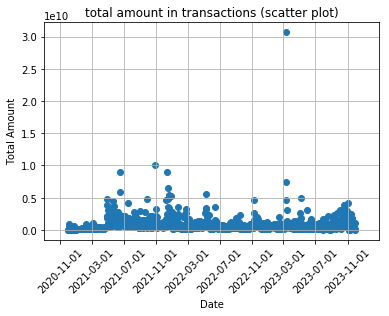

In [13]:
# Plot the scatter plot
# plt.scatter(grouped_df['DateTime'], grouped_df['amount'])
plt.scatter(grouped_df['DateTime'], grouped_df['amountUSD'])
plt.title("total amount in transactions (scatter plot)")
plt.xlabel("Date")
plt.ylabel("Total Amount")
# Format x-axis to display dates in "YYYY-MM-DD" format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()